In [1]:
# Importing the required Packages
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
import seaborn as sns
# re, spacy, gensim are just used to process text

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/NewsFMCG/NewsFMCGFinal.csv', encoding='latin1') 
                 #names=['Date', 'URL', 'Newspaper', 'Title', 'Article', 'Day', 'Month', 'ArticleLength'])
df.shape

(449, 8)

In [3]:
df.drop(['URL', 'Newspaper','Title', 'Day'],axis=1,inplace=True)
df.shape

(449, 4)

In [4]:
df.head()

,Date,Article,Month,ArticleFinal
0,05-03-2020,FMCG companies are either ramping up productio...,3,fmcg company either ramp production double dis...
1,05-03-2020,Third-party logistics services provider Mahind...,3,thirdparty logistics service provider mahindra...
2,08-03-2020,(This story originally appeared in on Mar 08 ...,3,story originally appear mumbai inc appear move...
3,12-03-2020,New Delhi: COVID-19 grips the job market with ...,3,new delhi covid grip job market sector registe...
4,18-03-2020,Even as India Inc implements work-from-home to...,3,inc implement workfromhome counter threat covi...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
long_string1 = ' '.join(list(df['Article'].values))
long_string_list1 = long_string1.split()
len(long_string_list1)
text = nltk.Text(long_string_list1)

In [7]:
text.concordance('kirana')

Displaying 25 of 99 matches:
rs too were unable to move stock to kirana stores and large grocery stores bec
retailers including small shops and kirana stores to arrange their own transpo
eople who will go deliver them to a kirana store. If they (kirana stores) have
Â.Grocery shops face shortagesSome kirana stores have closed down for the tim
s have fallen drastically and local kirana stores are not equipped to handle h
traditional network of retail shops kirana stores and online e-commerce platfo
e lockdown thousands of unorganised kirana stores or mom-and-pop grocery stori
ors. As stocks are getting depleted kirana store owners are saddled with only 
mpty racks staring at them.Ramesh a kirana store owner at Domalguda in the cit
oducts Â a leader of the Hyderabad Kirana Merchants Association said on condi
 of the lockdown Â Venkata Reddy a kirana store owner in Himayatnagar said. M
 staff whose earnings fell sharply. Kirana and neighbourhood stores are facing
the wherewithal to reac

In [8]:
word_caps = []
for word in long_string_list1:
    for i in range(len(word)):
        if word[i].isupper():
            word_caps.append(word)
len(list(set(word_caps)))

9422

In [30]:
import re
import string
remove = ['is','the','back','even','month','due','according','will','say','well','said', 'also','see','many','us','around','jan','feb','mar',
          'apr','may','jun','jul','aug','sept','oct','nov','dec','sep','january','february','march','april','may','june','july','august',
          'september','take','day','make','given','come','number','one','including','seen','says','saying','director','new','delhi',
          'kolkata','newsletter','enter','valid','email','thank','subscribe','newslettershare','hindustan','unilever','chief','executive',
          'officer','godrej','itc','dabur','hul','nielsen','crore','via','ltd','viaclick','read','mint','channel','telegram','updated',
          'epaperlivemint','com','epaperlivemint com','epaperlivemintcom','join','livemint','chairman','director','kataria','ceo','last','week','stay', 'update','can','not','covid','firm',
          'spread','stay','update','south','fmcg','fastmoving','quarter','maker','period','year','mallick','deputy','adani','parle','ministry',
          'basu','president','top','sector','head','domex','like','would','line','country','part','various','far','lot','already','nestle',
          'mumbai','kolkata','new','delhi','spokesperson','britannia','bengaluru','bengalurukolkata','kotak','mahindra','million','state','base',
          'come','several','three','day','two','bring','city','though','happen','year','witness','amul','space','way','billion','become','remain',
          'case','set','saw','likely','marico','lakh','nearly','see','face','tell','keep','might','within','despite','another','biyani','rai',
          'jalan','haritash','walmart','hdfc','much','look','still','month','now','major','city','firm','tell','take','day','remain','state',
          'currently','thing','current','indian','tell','ask','look','week','open','close','month','day','continue','large','high','continue','term',
          'expect','india','cent','per','call','almost','world','open','end','show','announce','first','second','more','such','go','other','add',
          'however','report','pre','move','digit','here','when','company']

def clean_text(txt_lower):
    tokens = re.split(r'\W+',txt_lower)
    txt_lower = ' '.join([word for word in tokens if word not in remove])
    txt_lower = ''.join([i for i in txt_lower if not i.isdigit()])
    return(txt_lower)

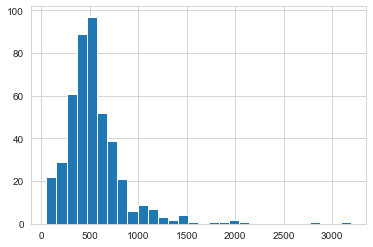

In [10]:
import seaborn as sns
sns.set_style('whitegrid')
df['Word_Count'] = df['Article'].apply(lambda x: len(x.split()))
df['Word_Count'].hist(bins=30);

In [11]:
import string
df['Article'] = df['Article'].map(lambda x: x.lower())
df['Article'] = df['Article'].map(lambda x: ''.join([ch for ch in x if ch not in string.punctuation]))

In [12]:
# Use Article Column and pre-process from the beginning
# Remove emails, newline characters, extra spaces
# Covert to list
data = df['Article'].values.tolist()

# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]

# Removes Digits
data = [re.sub(r'[0-9]+', '', sent) for sent in data]

In [13]:
data[:2]

['fmcg companies are either ramping up production or doubling down on distribution efforts to ensure availability of hygiene products such as handwash and hand sanitisers on retail shelves to meet the massive spike in demand as india begins reporting an increase in the number of coronavirus casesconsumers in certain regions took to social media to report shortage of products such as hand sanitisers but key fmcg players on wednesday stated they have adequate stocks available for such productscreating awarenesssunil kataria ceo india saarc godrej consumer products ltd said we have ramped up production of protekt hand wash and sanitisers in our units as well as through our vendor partner units we have also started a strong digital campaign on godrej protekt to create awareness about the regime of washing hands regularly as it helps in preventing spread of viruses â\x9d he said the intent of such a campaign is to educate consumers on prevention of spread of covida company spokesperson for 

In [14]:
len(data)

449

In [15]:
df['ArticleTopic'] = pd.Series(data)
df['ArticleTopic'].shape

(449,)

In [16]:
df['ArticleTopic'] = df['ArticleTopic'].apply(lambda x: x.split())
data_words = list(df['ArticleTopic'].values)
len(data_words)

449

In [17]:
data_words[:1]

[['fmcg',
  'companies',
  'are',
  'either',
  'ramping',
  'up',
  'production',
  'or',
  'doubling',
  'down',
  'on',
  'distribution',
  'efforts',
  'to',
  'ensure',
  'availability',
  'of',
  'hygiene',
  'products',
  'such',
  'as',
  'handwash',
  'and',
  'hand',
  'sanitisers',
  'on',
  'retail',
  'shelves',
  'to',
  'meet',
  'the',
  'massive',
  'spike',
  'in',
  'demand',
  'as',
  'india',
  'begins',
  'reporting',
  'an',
  'increase',
  'in',
  'the',
  'number',
  'of',
  'coronavirus',
  'casesconsumers',
  'in',
  'certain',
  'regions',
  'took',
  'to',
  'social',
  'media',
  'to',
  'report',
  'shortage',
  'of',
  'products',
  'such',
  'as',
  'hand',
  'sanitisers',
  'but',
  'key',
  'fmcg',
  'players',
  'on',
  'wednesday',
  'stated',
  'they',
  'have',
  'adequate',
  'stocks',
  'available',
  'for',
  'such',
  'productscreating',
  'awarenesssunil',
  'kataria',
  'ceo',
  'india',
  'saarc',
  'godrej',
  'consumer',
  'products',
  '

In [18]:
# Lemmatization: Converting words to their root words
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Run in terminal: python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [19]:
data_lemmatized[:1]

['company ramp production double distribution effort ensure availability hygiene product such handwash hand sanitiser retail shelf meet massive spike demand begin report increase number coronavirus casesconsumer certain region take social medium report shortage product such hand sanitiser key fmcg player state adequate stock available such productscreating say ramp production protekt hand wash sanitiser unit as well vendor partner unit also start strong digital campaign godrej protekt create awareness regime wash hand regularly help prevent spread virus say intent campaign educate consumer prevention spread company spokesperson say company adequate stock hand sanitiser meet spike demand give surge demand hygiene product redouble effort ensure consumer access product keep safe such lifebuoy hand sanitiser hand wash certain pocket may witness shortage sudden demand overall adequate stock hand sanitiser gear meet increase demand spokesperson addedcompanie also begin strategic campaign rai

In [ ]:
'state',''

In [20]:
len(data_lemmatized)

449

In [21]:
word = ['good','item','goods']

long_string = ','.join(data_lemmatized)
for w in word:
    long_string = long_string.replace(w, 'product')
data_lemmatized = long_string.split(',')
len(data_lemmatized)

449

In [22]:
long_string.split(',')[:2]

['company ramp production double distribution effort ensure availability hygiene product such handwash hand sanitiser retail shelf meet massive spike demand begin report increase number coronavirus casesconsumer certain region take social medium report shortage product such hand sanitiser key fmcg player state adequate stock available such productscreating say ramp production protekt hand wash sanitiser unit as well vendor partner unit also start strong digital campaign godrej protekt create awareness regime wash hand regularly help prevent spread virus say intent campaign educate consumer prevention spread company spokesperson say company adequate stock hand sanitiser meet spike demand give surge demand hygiene product redouble effort ensure consumer access product keep safe such lifebuoy hand sanitiser hand wash certain pocket may witness shortage sudden demand overall adequate stock hand sanitiser gear meet increase demand spokesperson addedcompanie also begin strategic campaign rai

In [23]:
df['ArticleTopic'] = pd.Series(data_lemmatized)
df['ArticleTopic'].shape

(449,)

In [31]:
df['ArticleTopic'] = df['ArticleTopic'].apply(lambda x: clean_text(x))
df['ArticleTopic'].shape

(449,)

In [32]:
df['ArticleTopic'].iloc[0]

'ramp production double distribution effort ensure availability hygiene product handwash hand sanitiser retail shelf meet massive spike demand begin increase coronavirus casesconsumer certain region social medium shortage product hand sanitiser key player adequate stock available productscreating ramp production protekt hand wash sanitiser unit as vendor partner unit start strong digital campaign protekt create awareness regime wash hand regularly help prevent virus intent campaign educate consumer prevention adequate stock hand sanitiser meet spike demand give surge demand hygiene product redouble effort ensure consumer access product safe lifebuoy hand sanitiser hand wash certain pocket shortage sudden demand overall adequate stock hand sanitiser gear meet increase demand addedcompanie begin strategic campaign raise awareness handwash time globe battle virus outbreakstate adequate supply product market â spokespeson focus enhance awareness hand hygiene urge consumer maintain product 

In [33]:
data_Cleaned = df['ArticleTopic'].values.tolist()
len(data_Cleaned)

449

In [34]:
data_Cleaned[:1]

['ramp production double distribution effort ensure availability hygiene product handwash hand sanitiser retail shelf meet massive spike demand begin increase coronavirus casesconsumer certain region social medium shortage product hand sanitiser key player adequate stock available productscreating ramp production protekt hand wash sanitiser unit as vendor partner unit start strong digital campaign protekt create awareness regime wash hand regularly help prevent virus intent campaign educate consumer prevention adequate stock hand sanitiser meet spike demand give surge demand hygiene product redouble effort ensure consumer access product safe lifebuoy hand sanitiser hand wash certain pocket shortage sudden demand overall adequate stock hand sanitiser gear meet increase demand addedcompanie begin strategic campaign raise awareness handwash time globe battle virus outbreakstate adequate supply product market â spokespeson focus enhance awareness hand hygiene urge consumer maintain product

In [35]:
from wordcloud import WordCloud

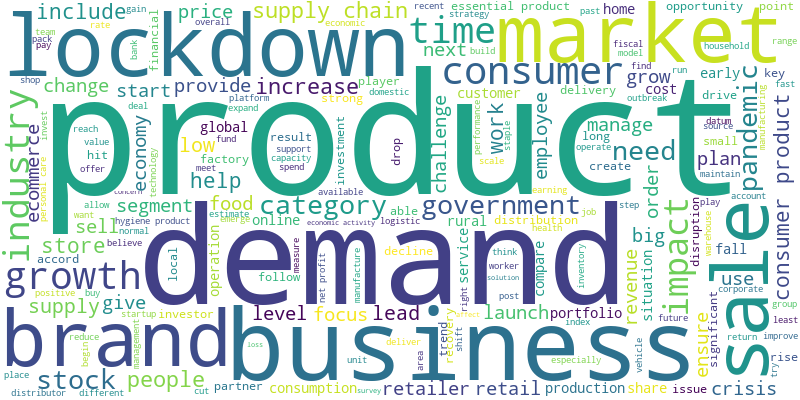

In [36]:
# After dropping additional stopwords, join the different processed articles together.
long_string_viz = ','.join(data_Cleaned)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, 
                      contour_color='steelblue', width=800, height=400)
# Generate a word cloud
wordcloud.generate(long_string_viz)
# Visualize the word cloud
wordcloud.to_image()

In [38]:
# Create the Document-term Matrix
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{1,}',  # num chars > 1
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_Cleaned)

In [39]:
# Check the Sparsicity
# The percentage of non-zero datapoints in the document-word matrix

# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  7.338003644462441 %


**N-grams**

In [40]:
from nltk import bigrams, trigrams
unigrams = nltk.word_tokenize(' '.join(data_Cleaned))
bigrams = bigrams(unigrams)
trigrams = trigrams(unigrams)

In [41]:
import seaborn as sns
sns.set_style('whitegrid')

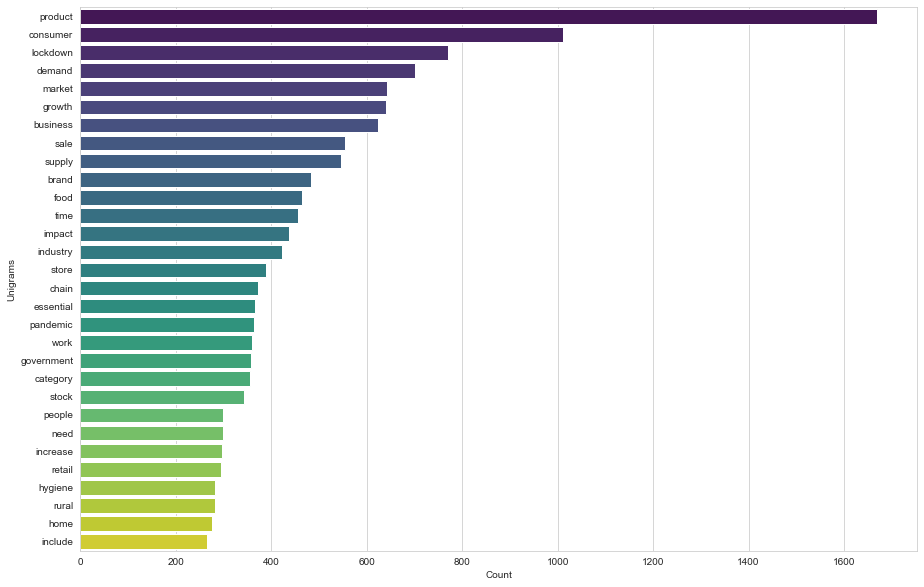

In [42]:
def get_top_n_words(corpus, n=None):
    count_vectorizer = CountVectorizer(ngram_range=(1, 1))
    vec = count_vectorizer.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['ArticleTopic'], 50)
#for word, freq in common_words:
    #print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Unigrams' , 'Count'])
ser2 = df2.groupby('Unigrams').sum()['Count'].sort_values(ascending=False)
ax = plt.figure(figsize=(15,10))
ax = sns.barplot(x='Count',y='Unigrams',data=df2[:30],palette='viridis');

In [45]:
long_string2 = ' '.join(list(df['ArticleTopic'].values))
long_string_list2 = long_string2.split()
print(len(long_string_list2))
text = nltk.Text(long_string_list2)

99113


In [46]:
text.concordance('kirana')

Displaying 18 of 18 matches:
difficult find people deliver store kirana store own transport pick stuff kolk
t noodle biscuit snack retail store kirana cause huge surge demand product com
r buy regularly chunk manpower send kirana chain retailer send own truck direc
ner online retailer food aggregator kirana grocery store help ease lastmile de
ore great effort size market govern kirana salient bit mythkirana main avenue 
grow slump allthere problem romance kirana fact should table past slow so trad
 format consumer residential colony kirana heart hyperlocal phone deliver home
ilment easy pipe product kiranasthe kirana know assortment consumer basket sel
re product trade format supermarket kirana modern trade store especially deman
illage so next reopen closure small kirana affect reach manage varun store clo
hurry think situation where service kirana so entrepreneurial operate service 
oduct unprecedented quantity extent kirana find hard source food product consu
dow brand replace old l

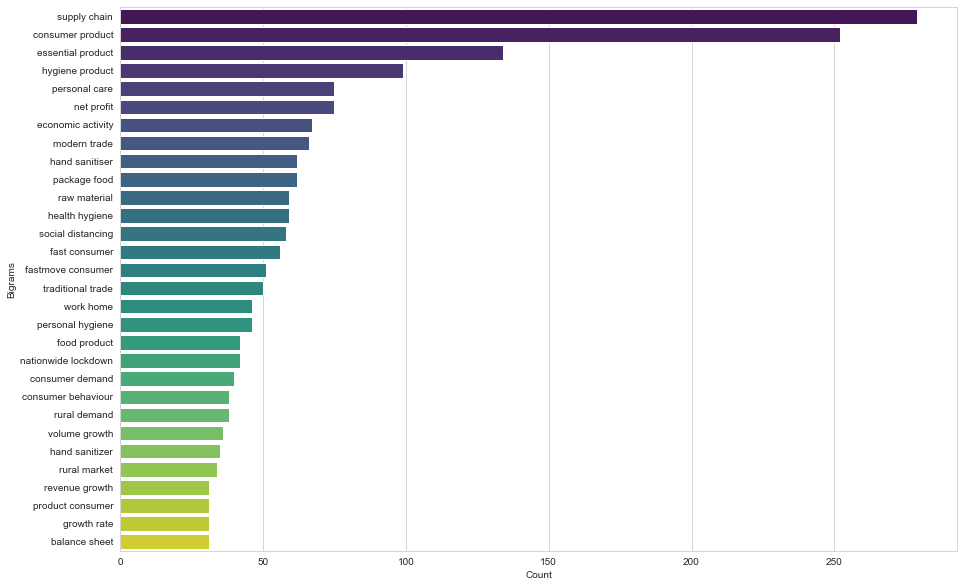

In [43]:
def get_top_n_words(corpus, n=None):
    count_vectorizer = CountVectorizer(ngram_range=(2, 2))
    vec = count_vectorizer.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['ArticleTopic'], 50)
#for word, freq in common_words:
    #print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Bigrams' , 'Count'])
ser2 = df2.groupby('Bigrams').sum()['Count'].sort_values(ascending=False)
ax = plt.figure(figsize=(15,10))
ax = sns.barplot(x='Count',y='Bigrams',data=df2[:30],palette='viridis');
#ax.set_yticklabels(ser2.index,rotation=0);

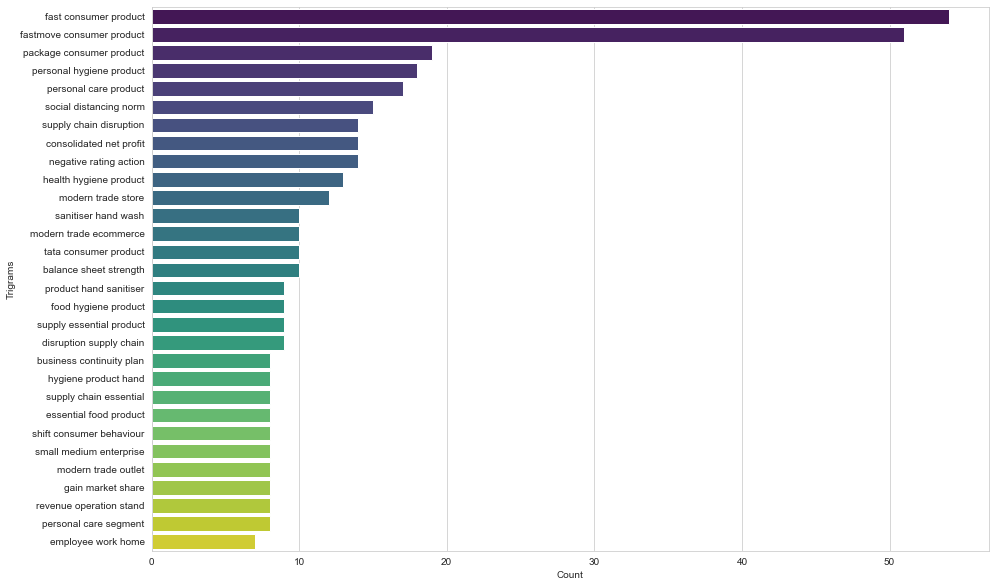

In [44]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['ArticleTopic'], 30)
#for word, freq in common_words:
    #print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Trigrams' , 'Count'])
ser3 = df3.groupby('Trigrams').sum()['Count'].sort_values(ascending=False)
ax = plt.figure(figsize=(15,10))
ax = sns.barplot(x='Count',y='Trigrams',data=df3,palette='viridis');

In [47]:
df = pd.read_csv('E:/NewsFMCG/FMCGNewsTopic(2).csv', encoding='latin1') 
                 #names=['Date', 'URL', 'Newspaper', 'Title', 'Article', 'Day', 'Month', 'ArticleLength'])
df.shape

(449, 10)

In [49]:
df.columns

Index(['Date', 'URL', 'Newspaper', 'Title', 'Article', 'Day', 'Month',
       'ArticleFinal', 'ArticleFinal_replaceWord', 'WordCount'],
      dtype='object')

In [50]:
data_Cleaned = df['ArticleFinal_replaceWord'].values.tolist()
print(len(data_Cleaned))
# Create the Document-term Matrix
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=10,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{1,}',  # num chars > 1
                             # max_features=50000,             # max number of uniq words
                            )

data_vectorized = vectorizer.fit_transform(data_Cleaned)

# Check the Sparsicity
# The percentage of non-zero datapoints in the document-word matrix

# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

449
Sparsicity:  7.462892449170198 %


In [14]:
# Build LDA model with Sk-learn
# Build LDA Model with number of topics based on prior knowledge
lda_model = LatentDirichletAllocation(n_components=12,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='batch',   
                                      random_state=100,          # Random state
                                      #batch_size=128,           # n docs in each learning iter, only used in online learning
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(n_components=12, n_jobs=-1, random_state=100)


In [15]:
# Diagnose model performance with perplexity and log-likelihood
# A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. Let’s check for our model.

# Log Likelihood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
lda_model.get_params()

Log Likelihood:  -641489.0845256547
Perplexity:  676.0616214243984


{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 12,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [51]:
# Grid Search the best LDA model
# Define Search Param
search_params = {'n_components': [4, 8, 12, 16, 20, 24, 28, 32], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [4, 8, 12, 16, 20, 24, 28, 32]})

In [52]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 4}
Best Log Likelihood Score:  -120250.94935535453
Model Perplexity:  801.2188991673539


In [57]:
# Define Search Param
search_params_fine = {'n_components': [2, 3, 4, 5, 6, 7], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda_fine = LatentDirichletAllocation()

# Init Grid Search Class
model_fine = GridSearchCV(lda_fine, param_grid=search_params_fine)

# Do the Grid Search
gscore_fine = model_fine.fit(data_vectorized)

# Best Model
best_lda_model_fine = model_fine.best_estimator_

# Model Parameters
print("Best Model's Params: ", model_fine.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model_fine.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model_fine.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 2}
Best Log Likelihood Score:  -117234.85920725965
Model Perplexity:  830.5774345879668


A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good!

In [54]:
model.cv_results_['mean_test_score']
model.cv_results_['params']

[{'learning_decay': 0.5, 'n_components': 4},
 {'learning_decay': 0.5, 'n_components': 8},
 {'learning_decay': 0.5, 'n_components': 12},
 {'learning_decay': 0.5, 'n_components': 16},
 {'learning_decay': 0.5, 'n_components': 20},
 {'learning_decay': 0.5, 'n_components': 24},
 {'learning_decay': 0.5, 'n_components': 28},
 {'learning_decay': 0.5, 'n_components': 32},
 {'learning_decay': 0.7, 'n_components': 4},
 {'learning_decay': 0.7, 'n_components': 8},
 {'learning_decay': 0.7, 'n_components': 12},
 {'learning_decay': 0.7, 'n_components': 16},
 {'learning_decay': 0.7, 'n_components': 20},
 {'learning_decay': 0.7, 'n_components': 24},
 {'learning_decay': 0.7, 'n_components': 28},
 {'learning_decay': 0.7, 'n_components': 32},
 {'learning_decay': 0.9, 'n_components': 4},
 {'learning_decay': 0.9, 'n_components': 8},
 {'learning_decay': 0.9, 'n_components': 12},
 {'learning_decay': 0.9, 'n_components': 16},
 {'learning_decay': 0.9, 'n_components': 20},
 {'learning_decay': 0.9, 'n_components':

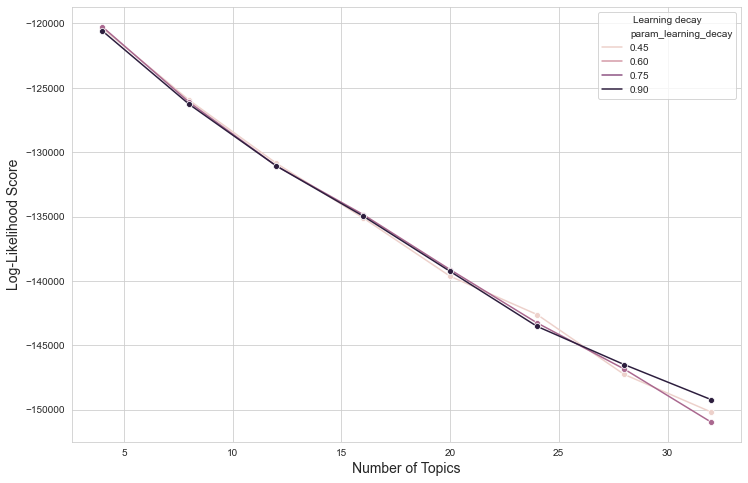

In [56]:
import seaborn as sns

results = pd.DataFrame(model.cv_results_)

sns.set_style('whitegrid')

plt.figure(figsize=(12,8))

sns.lineplot(data=results,
x='param_n_components',
y='mean_test_score',
hue='param_learning_decay',
marker='o'
)
plt.xlabel("Number of Topics", fontsize=14)
plt.ylabel("Log-Likelihood Score", fontsize=14)
plt.legend(title='Learning decay', loc='best')

plt.show()

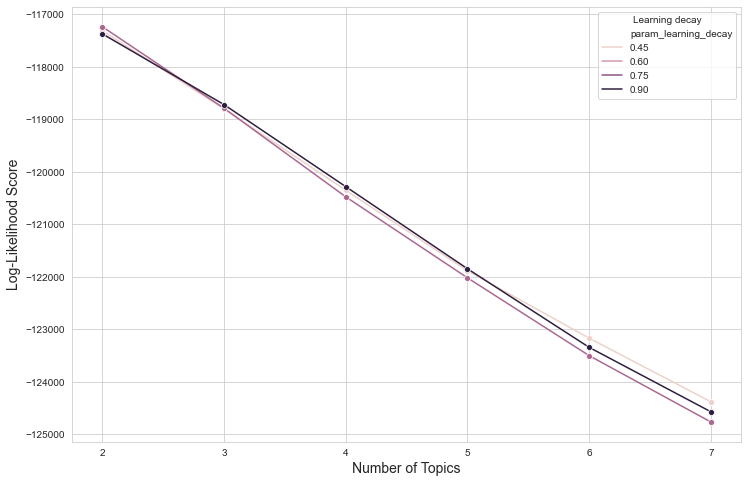

In [59]:
results_fine = pd.DataFrame(model_fine.cv_results_)

sns.set_style('whitegrid')

plt.figure(figsize=(12,8))

sns.lineplot(data=results_fine,
x='param_n_components',
y='mean_test_score',
hue='param_learning_decay',
marker='o'
)
plt.xlabel("Number of Topics", fontsize=14)
plt.ylabel("Log-Likelihood Score", fontsize=14)
plt.legend(title='Learning decay', loc='best')

plt.show()

In [67]:
# Build LDA model with Sk-learn using 4 topics
# Build LDA Model with number of topics based on prior knowledge
lda_model_final = LatentDirichletAllocation(n_components=4,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_decay = 0.75,
                                      learning_method='batch',   
                                      random_state=100,          # Random state
                                      #batch_size=128,           # n docs in each learning iter, only used in online learning
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output_final = lda_model_final.fit_transform(data_vectorized)

print(lda_model_final)  # Model attributes

LatentDirichletAllocation(learning_decay=0.75, n_components=4, n_jobs=-1,
                          random_state=100)


In [68]:
# Diagnose model performance with perplexity and log-likelihood
# A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. Let’s check for our model.

# Log Likelihood: Higher the better
print("Log Likelihood: ", lda_model_final.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model_final.perplexity(data_vectorized))

# See model parameters
lda_model_final.get_params()

Log Likelihood:  -554537.1787139846
Perplexity:  801.631516360862


{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.75,
 'learning_method': 'batch',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}

In [69]:
# Dominant Topic in each Document
# In the table below, I’ve greened out all major topics in a document and assigned the most dominant 
# topic in its own column.

# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,dominant_topic
Doc0,0.000000,0.000000,1.000000,0.000000,2
Doc1,0.290000,0.430000,0.000000,0.270000,1
Doc2,0.960000,0.000000,0.000000,0.030000,0
Doc3,0.450000,0.450000,0.000000,0.090000,0
Doc4,1.000000,0.000000,0.000000,0.000000,0
Doc5,0.890000,0.000000,0.000000,0.110000,0
Doc6,0.660000,0.140000,0.000000,0.190000,0
Doc7,0.000000,0.070000,0.570000,0.360000,2
Doc8,0.000000,0.410000,0.590000,0.000000,2
Doc9,0.000000,0.000000,0.990000,0.000000,2


In [70]:
df_sty = df_document_topics.data
type(df_sty)

pandas.core.frame.DataFrame

In [38]:
# Review Topics distribution across documents
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,161
1,0,116
2,3,91
3,1,81


In [71]:
# Visualizing the LDA model with pyLDAvis
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, data_vectorized, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      269.562408 -124.803398       1        1  32.494123
1        1.782994 -295.079681       2        1  25.754713
0      220.811432 -343.832123       3        1  24.931918
3       50.533993  -76.050934       4        1  16.819245, topic_info=          Term        Freq       Total Category  logprob  loglift
585     growth  629.000000  629.000000  Default  30.0000  30.0000
1348     store  390.000000  390.000000  Default  29.0000  29.0000
347   delivery  256.000000  256.000000  Default  28.0000  28.0000
923     online  230.000000  230.000000  Default  27.0000  27.0000
1173    retail  310.000000  310.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1301     small   73.072159  182.146409   Topic4  -5.2517   0.8693
955   pandemic   84.853370  361.309560   Topic4  -5.1022   0.3338
657   increase   78.939970  278.293624   Topic4  -5.1744   0.5227
772   lockdown   90.051777  753.715306   Topic4  -5.0427  -0.3420
1251   service   69.922503  254.418233   Topic4  -5.2957   0.4911

[313 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
8         3  0.127727     acquire
8         4  0.830224     acquire
13        1  0.103743    activity
13        2  0.186738    activity
13        3  0.691622    activity
...     ...       ...         ...
1545      2  0.914573  yearonyear
1545      4  0.085077  yearonyear
1547      2  0.987196         yoy
1549      1  0.026269      zomato
1549      4  0.971968      zomato

[675 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

In [72]:
# Topic's keywords
# Constructing a weight matrix for all keywords in each topic
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()
# Below dataframe gives the topic-word weights

,ability,able,absence,accelerate,access,accordingly,account,achieve,acquire,acquisition,...,worry,worth,write,x,yearago,yearonyear,yes,yoy,zero,zomato
Topic0,17.054937,35.023304,8.355854,0.270535,11.591294,0.269480,35.344393,7.611390,4.294426,0.256996,...,18.417337,20.092358,0.296171,0.271661,0.343319,0.282483,17.974511,0.253745,12.635719,0.250837
Topic1,5.178123,2.865925,0.273668,9.553675,0.253308,0.268727,40.655588,5.669729,0.324345,9.873552,...,5.931951,4.012606,4.195985,0.260796,30.154426,43.828457,3.164528,60.240880,0.256234,0.251530
Topic2,15.345470,67.081063,7.701664,11.825536,15.879866,6.387498,5.112269,4.823737,0.257681,0.259782,...,3.390127,0.258090,9.840210,1.945270,0.251430,0.252575,3.602899,0.252154,2.840219,1.087828
Topic3,1.421470,17.029707,0.668814,14.350253,24.275532,5.074295,11.887749,12.895144,27.123549,22.609669,...,0.260585,3.636946,3.667635,11.522272,0.250826,3.636485,0.258062,0.253220,0.267827,37.409804


In [73]:
# Top 15 keywords in each topic that are representative of the topic
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model_final, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,industry,market,business,time,economy,bank,economic,employee,service,government,lockdown,demand,need,investor,product
Topic 1,growth,product,demand,sale,consumer,market,rural,lockdown,revenue,category,decline,business,segment,expect,high
Topic 2,product,consumer,supply,lockdown,food,essential,brand,hygiene,chain,government,demand,hand,ensure,production,launch
Topic 3,store,retail,delivery,online,ecommerce,business,consumer,product,sale,brand,supply,chain,retailer,platform,order


In [ ]:
# Clustering documents that share similar topics and plot them
